___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [6]:
df.isnull().sum().any()

False

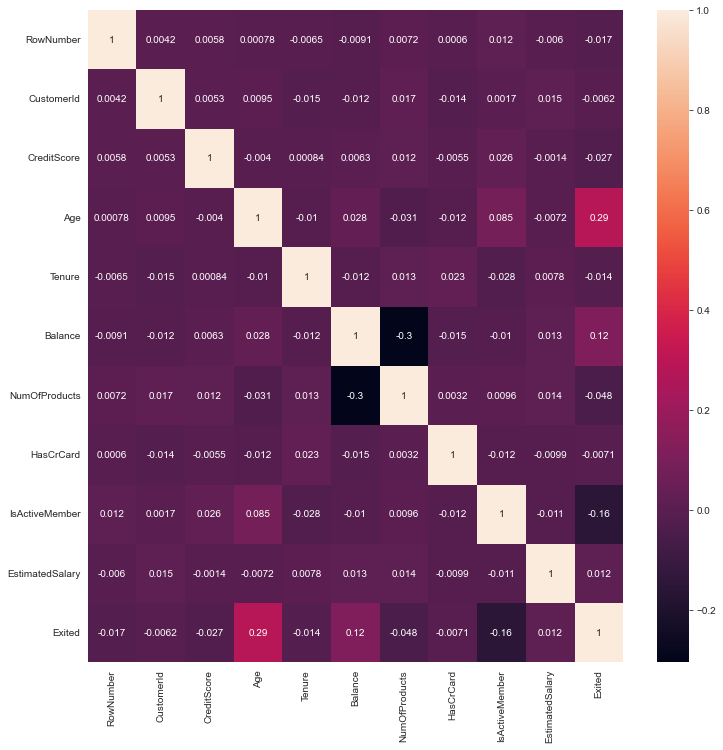

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True);

In [8]:
df.shape

(10000, 14)

In [9]:
drop_list = ["RowNumber", "CustomerId", "Surname"]

In [10]:
df = df.drop(drop_list, axis = 1)

In [11]:
df.shape

(10000, 11)

In [12]:
df.describe(include=object).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [13]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [14]:
df.duplicated().value_counts()

False    10000
dtype: int64

#### Target Examination

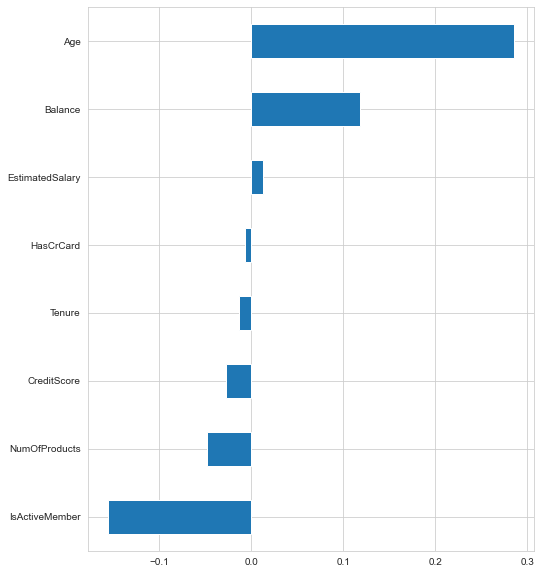

In [15]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [16]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

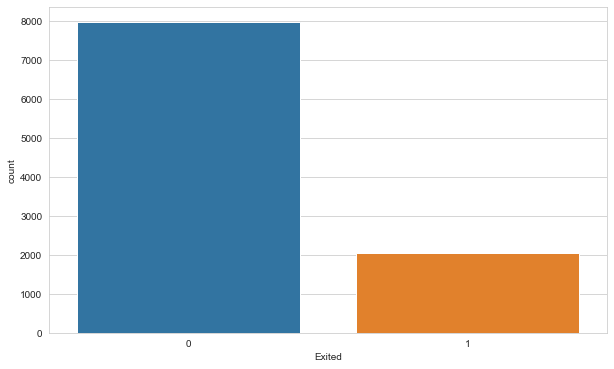

In [17]:
sns.countplot(df["Exited"]);

0    7963
1    2037
Name: Exited, dtype: int64


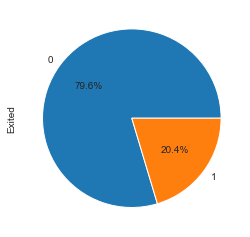

In [18]:
print(df["Exited"].value_counts())
df["Exited"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(4,6));

In [19]:
df["Exited"].describe()

count   10000.000
mean        0.204
std         0.403
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Exited, dtype: float64

In [20]:
df.drop('Exited', axis=1).select_dtypes('object')

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [21]:
pd.crosstab(df["Geography"], df["Exited"])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [22]:
 pd.crosstab(df["Gender"], df["Exited"])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [23]:
df["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [24]:
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [25]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [26]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [27]:
df.drop(['Exited'], axis=1).select_dtypes('number').astype('float64')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880
1,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580
2,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570
3,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630
4,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100
...,...,...,...,...,...,...,...,...
9995,771.000,39.000,5.000,0.000,2.000,1.000,0.000,96270.640
9996,516.000,35.000,10.000,57369.610,1.000,1.000,1.000,101699.770
9997,709.000,36.000,7.000,0.000,1.000,0.000,1.000,42085.580
9998,772.000,42.000,3.000,75075.310,2.000,1.000,0.000,92888.520


In [28]:
df=pd.get_dummies(df, drop_first=False)

In [29]:
df.shape

(10000, 14)

# Preprocessing of Data
- Train | Test Split, Scalling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [32]:
seed = 42

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [103]:
X_train.shape

(9000, 13)

In [104]:
X_test.shape

(1000, 13)

In [105]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [106]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6160 - recall: 0.1362 - val_loss: 0.5076 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4991 - recall: 0.0000e+00 - val_loss: 0.4789 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4813 - recall: 0.0000e+00 - val_loss: 0.4619 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4694 - recall: 0.0182 - val_loss: 0.4487 - val_recall: 0.0884
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4605 - recall: 0.1029 - val_loss: 0.4394 - val_recall: 0.1436
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4504 - recall: 0.1047 - val_loss: 0.4273 - val_recall: 0.1436
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4393 - recall: 0.1416 - val_loss: 0.4148 - val_recall: 0.1713
Epoch 8/300
64/64 [==

64/64 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4867 - val_loss: 0.2911 - val_recall: 0.5635
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4909 - val_loss: 0.2911 - val_recall: 0.5525
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3210 - recall: 0.4891 - val_loss: 0.2956 - val_recall: 0.5967
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3237 - recall: 0.5036 - val_loss: 0.2920 - val_recall: 0.5083
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3218 - recall: 0.4897 - val_loss: 0.2998 - val_recall: 0.5470
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3214 - recall: 0.4855 - val_loss: 0.2911 - val_recall: 0.5359
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3237 - recall: 0.4903 - val_loss: 0.2921 - val_recall: 0.5525
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3168 - recall: 0.5085 - val_loss: 0.2921 - val_recall: 0.5691
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3156 - recall: 0.5042 - val_loss: 0.2910 - val_recall: 0.5249
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3152 - recall: 0.5079 - val_loss: 0.2928 - val_recall: 0.5912
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.5115 - val_loss: 0.2957 - val_recall: 0.5967
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3163 - recall: 0.5054 - val_loss: 0.2927 - val_recall: 0.5138
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3144 - recall: 0.5079 - val_loss: 0.2911 - val_recall: 0.5525
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3138 - recall: 0.5067 - val_loss: 0.2903 - val_recall: 0.5691
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3106 - recall: 0.5176 - val_loss: 0.2968 - val_recall: 0.5028
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3126 - recall: 0.5115 - val_loss: 0.2941 - val_recall: 0.5912
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3104 - recall: 0.5194 - val_loss: 0.2959 - val_recall: 0.5801
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3107 - recall: 0.5151 - val_loss: 0.2970 - val_recall: 0.5249
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3104 - recall: 0.5169 - val_loss: 0.2958 - val_recall: 0.5470
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3109 - recall: 0.5121 - val_loss: 0.2972 - val_recall: 0.4972
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3122 - recall: 0.5145 - val_loss: 0.2969 - val_recall: 0.6298
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3085 - recall: 0.5163 - val_loss: 0.2967 - val_recall: 0.6133
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3080 - recall: 0.5182 - val_loss: 0.2977 - val_recall: 0.6133
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3083 - recall: 0.5224 - val_loss: 0.2975 - val_recall: 0.5635
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3081 - recall: 0.5309 - val_loss: 0.2969 - val_recall: 0.5083
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3069 - recall: 0.5285 - val_loss: 0.2979 - val_recall: 0.5249


In [107]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                448       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [108]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.616,0.136,0.508,0.000
1,0.499,0.000,0.479,0.000
2,0.481,0.000,0.462,0.000
3,0.469,0.018,0.449,0.088
4,0.460,0.103,0.439,0.144


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

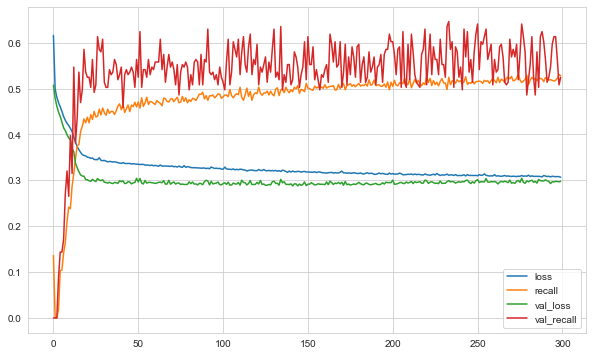

In [109]:
loss_df.plot();

In [110]:
model.evaluate(X_test, y_test, verbose=0)

[0.3460545241832733, 0.45098039507865906]

In [111]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3460545241832733
recall :  0.45098039507865906


In [112]:
y_pred = model.predict(X_test) > 0.5   
#y_pred = model.predict_classes(X_test) for tf 2.5.0 version 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[762  34]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.45      0.56       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.74      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 1ms/step


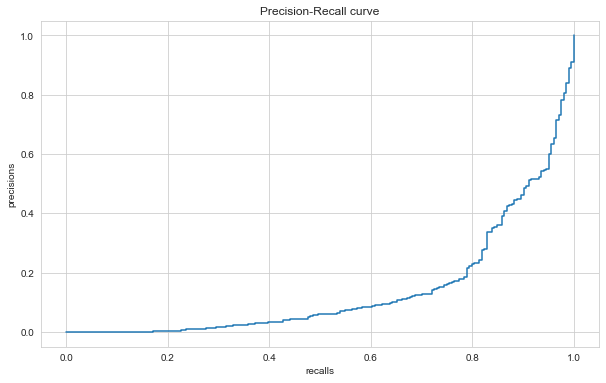

In [113]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [114]:
roc_auc_score(y_test, y_pred_proba)

0.859290324169869

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [44]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [93]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [94]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6795 - recall: 0.7415 - val_loss: 0.6999 - val_recall: 0.6906
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6499 - recall: 0.6344 - val_loss: 0.6480 - val_recall: 0.6685
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6261 - recall: 0.6277 - val_loss: 0.5945 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6076 - recall: 0.6816 - val_loss: 0.5598 - val_recall: 0.6409
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5920 - recall: 0.6901 - val_loss: 0.5606 - val_recall: 0.7072
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5775 - recall: 0.7016 - val_loss: 0.5062 - val_recall: 0.6354
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5623 - recall: 0.7064 - val_loss: 0.5485 - val_recall: 0.7680
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4386 - recall: 0.7827 - val_loss: 0.4248 - val_recall: 0.8343
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4371 - recall: 0.7821 - val_loss: 0.4217 - val_recall: 0.8232
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4365 - recall: 0.7797 - val_loss: 0.4562 - val_recall: 0.8287
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4412 - recall: 0.7803 - val_loss: 0.3883 - val_recall: 0.7735
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4379 - recall: 0.7778 - val_loss: 0.4319 - val_recall: 0.8066
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4376 - recall: 0.7881 - val_loss: 0.4143 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4399 - recall: 0.7893 - val_loss: 0.3934 - val_recall: 0.7901
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4271 - recall: 0.7900 - val_loss: 0.4508 - val_recall: 0.8066
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4231 - recall: 0.7851 - val_loss: 0.4088 - val_recall: 0.7735
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4226 - recall: 0.7936 - val_loss: 0.4491 - val_recall: 0.8177
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4239 - recall: 0.7960 - val_loss: 0.4452 - val_recall: 0.8066
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4243 - recall: 0.7954 - val_loss: 0.3913 - val_recall: 0.7735
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4218 - recall: 0.7984 - val_loss: 0.4249 - val_recall: 0.8011
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4232 - recall: 0.7936 - val_loss: 0.4015 - val_recall: 0.7790
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4132 - recall: 0.8057 - val_loss: 0.3989 - val_recall: 0.7790
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4146 - recall: 0.7960 - val_loss: 0.4463 - val_recall: 0.8066
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4111 - recall: 0.8081 - val_loss: 0.4444 - val_recall: 0.8011
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4131 - recall: 0.8033 - val_loss: 0.3906 - val_recall: 0.7569
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4106 - recall: 0.7960 - val_loss: 0.4034 - val_recall: 0.7735
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4123 - recall: 0.8063 - val_loss: 0.3857 - val_recall: 0.7680
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4130 - recall: 0.7984 - val_loss: 0.4295 - val_recall: 0.8177
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4056 - recall: 0.8130 - val_loss: 0.4268 - val_recall: 0.8177
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4041 - recall: 0.8063 - val_loss: 0.4279 - val_recall: 0.7956
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4041 - recall: 0.8093 - val_loss: 0.4092 - val_recall: 0.7845
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4034 - recall: 0.8136 - val_loss: 0.3943 - val_recall: 0.7735
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4037 - recall: 0.8087 - val_loss: 0.4151 - val_recall: 0.7901


In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                448       
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [96]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.680,0.742,0.700,0.691
1,0.650,0.634,0.648,0.669
2,0.626,0.628,0.595,0.674
3,0.608,0.682,0.560,0.641
4,0.592,0.690,0.561,0.707


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

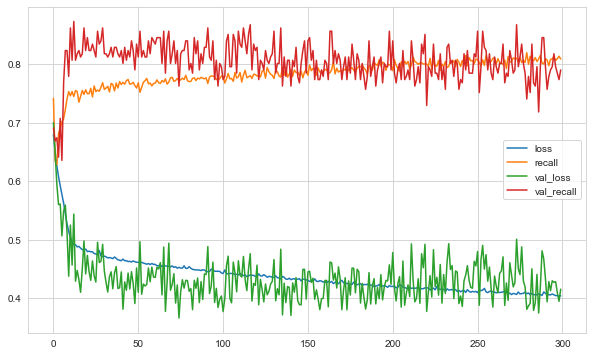

In [97]:
loss_df.plot();

In [98]:
model.evaluate(X_test, y_test, verbose=0)

[0.45652925968170166, 0.7401960492134094]

In [99]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[638 158]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.49      0.74      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



32/32 [==============================] - 0s 1ms/step


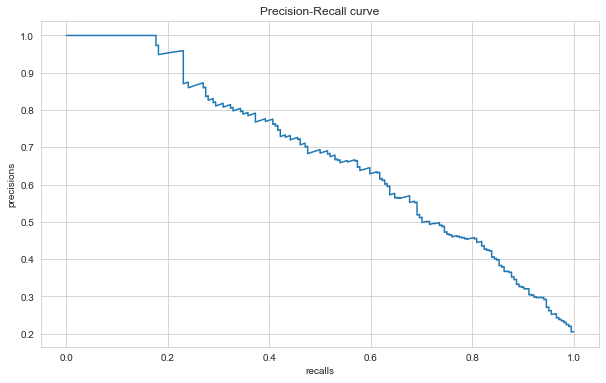

In [100]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [101]:
roc_auc_score(y_test, y_pred_proba)

0.8492092817026307

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [41]:
from tensorflow.keras.optimizers import Adam

In [126]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [127]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6501 - recall: 0.6489 - val_loss: 0.6373 - val_recall: 0.7680
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5942 - recall: 0.6713 - val_loss: 0.6315 - val_recall: 0.8619
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5585 - recall: 0.7046 - val_loss: 0.5291 - val_recall: 0.8287
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5114 - recall: 0.7439 - val_loss: 0.5355 - val_recall: 0.8619
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5058 - recall: 0.7470 - val_loss: 0.3957 - val_recall: 0.7680
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4979 - recall: 0.7367 - val_loss: 0.4097 - val_recall: 0.7790
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4905 - recall: 0.7506 - val_loss: 0.4187 - val_recall: 0.8011
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4165 - recall: 0.8039 - val_loss: 0.4591 - val_recall: 0.8398
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4089 - recall: 0.8136 - val_loss: 0.4723 - val_recall: 0.8122
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4066 - recall: 0.8075 - val_loss: 0.5049 - val_recall: 0.8287
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4162 - recall: 0.8051 - val_loss: 0.3659 - val_recall: 0.6961
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4092 - recall: 0.8123 - val_loss: 0.4552 - val_recall: 0.7790
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4098 - recall: 0.8039 - val_loss: 0.4633 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4100 - recall: 0.8172 - val_loss: 0.4625 - val_recall: 0.8011
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3917 - recall: 0.8245 - val_loss: 0.4594 - val_recall: 0.8011
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3893 - recall: 0.8275 - val_loss: 0.4611 - val_recall: 0.8287
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3912 - recall: 0.8269 - val_loss: 0.4485 - val_recall: 0.7901
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3879 - recall: 0.8160 - val_loss: 0.4939 - val_recall: 0.7956
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3942 - recall: 0.8111 - val_loss: 0.4441 - val_recall: 0.7735
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3865 - recall: 0.8251 - val_loss: 0.4472 - val_recall: 0.7956
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3856 - recall: 0.8232 - val_loss: 0.4426 - val_recall: 0.7680
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3737 - recall: 0.8402 - val_loss: 0.4256 - val_recall: 0.7238
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3772 - recall: 0.8360 - val_loss: 0.4911 - val_recall: 0.7845
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3783 - recall: 0.8317 - val_loss: 0.5086 - val_recall: 0.8066
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3756 - recall: 0.8269 - val_loss: 0.4390 - val_recall: 0.7514
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3674 - recall: 0.8329 - val_loss: 0.4540 - val_recall: 0.7459
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3748 - recall: 0.8366 - val_loss: 0.4535 - val_recall: 0.7514
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3734 - recall: 0.8293 - val_loss: 0.4796 - val_recall: 0.7735
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - recall: 0.8390 - val_loss: 0.5035 - val_recall: 0.7956
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3648 - recall: 0.8462 - val_loss: 0.4731 - val_recall: 0.7790
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3611 - recall: 0.8456 - val_loss: 0.4716 - val_recall: 0.7624
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3583 - recall: 0.8529 - val_loss: 0.4873 - val_recall: 0.7293
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3646 - recall: 0.8456 - val_loss: 0.5364 - val_recall: 0.8122


<AxesSubplot:>

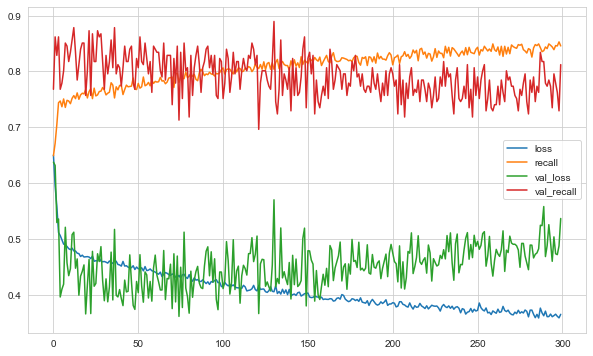

In [128]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [129]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5601887702941895
recall :  0.7843137383460999


In [131]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[591 205]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       796
           1       0.44      0.78      0.56       204

    accuracy                           0.75      1000
   macro avg       0.68      0.76      0.69      1000
weighted avg       0.83      0.75      0.77      1000



### Add Dropout Layer

In [40]:
from tensorflow.keras.layers import Dropout

In [133]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [134]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6988 - recall: 0.5775 - val_loss: 0.6918 - val_recall: 0.5691
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6882 - recall: 0.5073 - val_loss: 0.6863 - val_recall: 0.4972
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6858 - recall: 0.4679 - val_loss: 0.6808 - val_recall: 0.4972
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6844 - recall: 0.4528 - val_loss: 0.6753 - val_recall: 0.4917
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6816 - recall: 0.4195 - val_loss: 0.6719 - val_recall: 0.5028
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6803 - recall: 0.4044 - val_loss: 0.6604 - val_recall: 0.4199
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6763 - recall: 0.4013 - val_loss: 0.6603 - val_recall: 0.5470
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.5285 - recall: 0.6931 - val_loss: 0.4625 - val_recall: 0.8287
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5243 - recall: 0.7161 - val_loss: 0.4458 - val_recall: 0.8398
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5359 - recall: 0.6949 - val_loss: 0.4310 - val_recall: 0.8232
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5307 - recall: 0.6979 - val_loss: 0.4655 - val_recall: 0.8398
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5236 - recall: 0.7094 - val_loss: 0.4542 - val_recall: 0.8343
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5398 - recall: 0.7070 - val_loss: 0.4565 - val_recall: 0.8287
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5372 - recall: 0.6943 - val_loss: 0.4653 - val_recall: 0.8232
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.5319 - recall: 0.7070 - val_loss: 0.4397 - val_recall: 0.8287
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5292 - recall: 0.7113 - val_loss: 0.4442 - val_recall: 0.8287
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5289 - recall: 0.7076 - val_loss: 0.4585 - val_recall: 0.8287
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5233 - recall: 0.7300 - val_loss: 0.4382 - val_recall: 0.8287
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5282 - recall: 0.7137 - val_loss: 0.4370 - val_recall: 0.8287
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5206 - recall: 0.6961 - val_loss: 0.4439 - val_recall: 0.8287
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5318 - recall: 0.7337 - val_loss: 0.4322 - val_recall: 0.8232
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.5163 - recall: 0.7312 - val_loss: 0.4364 - val_recall: 0.8343
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5300 - recall: 0.7052 - val_loss: 0.4518 - val_recall: 0.8453
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5225 - recall: 0.7270 - val_loss: 0.4341 - val_recall: 0.8232
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5316 - recall: 0.7258 - val_loss: 0.4419 - val_recall: 0.8287
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5240 - recall: 0.7324 - val_loss: 0.4428 - val_recall: 0.8453
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5236 - recall: 0.7246 - val_loss: 0.4425 - val_recall: 0.8287
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5257 - recall: 0.7209 - val_loss: 0.4583 - val_recall: 0.8398
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.5260 - recall: 0.7040 - val_loss: 0.4470 - val_recall: 0.8398
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5300 - recall: 0.7088 - val_loss: 0.4541 - val_recall: 0.8398
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5188 - recall: 0.7052 - val_loss: 0.4407 - val_recall: 0.8343
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5194 - recall: 0.7288 - val_loss: 0.4430 - val_recall: 0.8508
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5279 - recall: 0.7203 - val_loss: 0.4565 - val_recall: 0.8674


<AxesSubplot:>

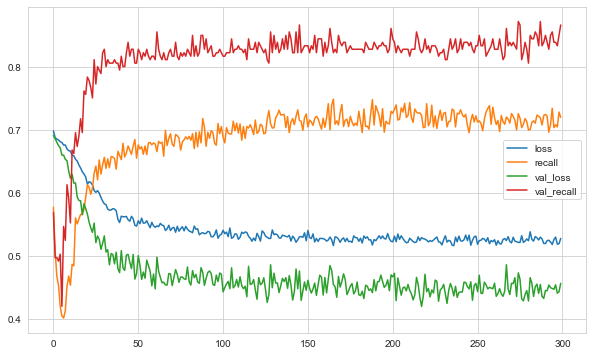

In [135]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [136]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4918881356716156
recall :  0.8235294222831726


In [137]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[570 226]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       796
           1       0.43      0.82      0.56       204

    accuracy                           0.74      1000
   macro avg       0.68      0.77      0.69      1000
weighted avg       0.84      0.74      0.76      1000



### Add Early Stop

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [142]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [143]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [144]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights,
          callbacks=[early_stop])

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6795 - recall: 0.7415 - val_loss: 0.6999 - val_recall: 0.6906
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6499 - recall: 0.6344 - val_loss: 0.6480 - val_recall: 0.6685
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6261 - recall: 0.6277 - val_loss: 0.5945 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6076 - recall: 0.6816 - val_loss: 0.5598 - val_recall: 0.6409
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5920 - recall: 0.6901 - val_loss: 0.5606 - val_recall: 0.7072
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5775 - recall: 0.7016 - val_loss: 0.5062 - val_recall: 0.6354
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5623 - recall: 0.7064 - val_loss: 0.5485 - val_recall: 0.7680
Epoch 8/300
64/64 [======================

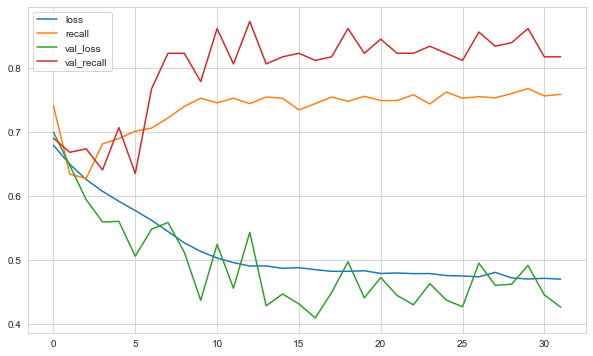

In [145]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [146]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.45358243584632874
recall :  0.6911764740943909


In [147]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1000us/step
[[630 166]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       796
           1       0.46      0.69      0.55       204

    accuracy                           0.77      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.82      0.77      0.79      1000



#### Monitor the "val_recall" as metric

In [148]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [149]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [150]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights,
          callbacks=[early_stop])

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6795 - recall: 0.7415 - val_loss: 0.6999 - val_recall: 0.6906
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6499 - recall: 0.6344 - val_loss: 0.6480 - val_recall: 0.6685
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6261 - recall: 0.6277 - val_loss: 0.5945 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6076 - recall: 0.6816 - val_loss: 0.5598 - val_recall: 0.6409
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5920 - recall: 0.6901 - val_loss: 0.5606 - val_recall: 0.7072
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5775 - recall: 0.7016 - val_loss: 0.5062 - val_recall: 0.6354
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5623 - recall: 0.7064 - val_loss: 0.5485 - val_recall: 0.7680
Epoch 8/300
64/64 [======================

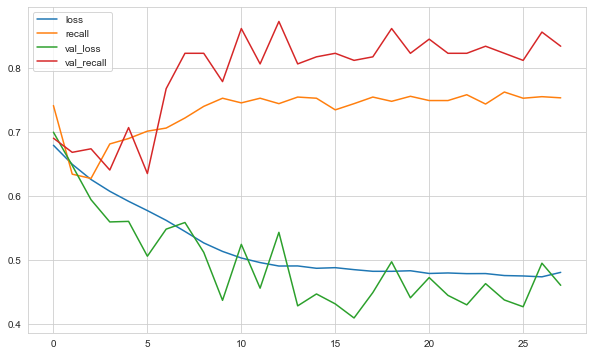

In [151]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [152]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5858337879180908
recall :  0.8235294222831726


In [153]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1000us/step
[[523 273]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77       796
           1       0.38      0.82      0.52       204

    accuracy                           0.69      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.69      0.72      1000



## GridSearchCV

In [161]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [162]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [163]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [164]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [165]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 300)

parameters = {'batch_size': [64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.7353 - recall: 0.9068 - val_loss: 0.7353 - val_recall: 0.8950
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.7347 - recall: 0.9050 - val_loss: 0.7347 - val_recall: 0.8895
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.7341 - recall: 0.9019 - val_loss: 0.7340 - val_recall: 0.8895
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.7334 - recall: 0.8995 - val_loss: 0.7334 - val_recall: 0.8895
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.7328 - recall: 0.8971 - val_loss: 0.7327 - val_recall: 0.8840
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.7321 - recall: 0.8959 - val_loss: 0.7320 - val_recall: 0.8785
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.7314 - recall: 0.8935 - val_loss: 0.7313

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022FF7C10130>,
             n_jobs=-1,
             param_grid={'batch_size': [64, 128],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [166]:
grid_model.best_score_

0.905851278972243

In [167]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.adadelta.Adadelta}

In [168]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
14,0.906,0.013,1,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
2,0.904,0.013,2,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
18,0.900,0.014,3,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
22,0.897,0.013,4,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
6,0.897,0.014,5,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
10,0.890,0.013,6,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
21,0.582,0.060,7,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
17,0.564,0.065,8,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
13,0.559,0.051,9,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
8,0.556,0.062,10,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

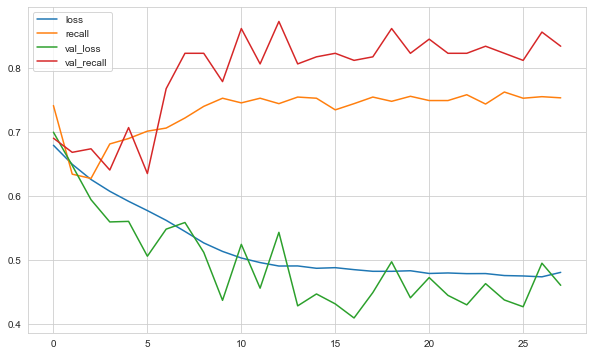

In [169]:
loss_df.plot();

In [171]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1000us/step
[[ 69 727]
 [ 23 181]]
              precision    recall  f1-score   support

           0       0.75      0.09      0.16       796
           1       0.20      0.89      0.33       204

    accuracy                           0.25      1000
   macro avg       0.47      0.49      0.24      1000
weighted avg       0.64      0.25      0.19      1000



32/32 [==============================] - 0s 1ms/step


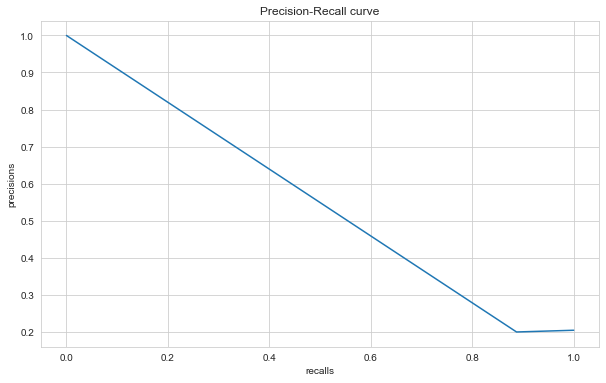

In [172]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [173]:
roc_auc_score(y_test, y_pred_proba)

0.4869691595231057

# Final Model and Model Deployment

In [174]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [175]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [176]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [177]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights,
          callbacks=[early_stop])

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6795 - recall: 0.7415 - val_loss: 0.6999 - val_recall: 0.6906
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6499 - recall: 0.6344 - val_loss: 0.6480 - val_recall: 0.6685
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6261 - recall: 0.6277 - val_loss: 0.5945 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6076 - recall: 0.6816 - val_loss: 0.5598 - val_recall: 0.6409
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5920 - recall: 0.6901 - val_loss: 0.5606 - val_recall: 0.7072
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5775 - recall: 0.7016 - val_loss: 0.5062 - val_recall: 0.6354
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5623 - recall: 0.7064 - val_loss: 0.5485 - val_recall: 0.7680
Epoch 8/300
64/64 [======================

<AxesSubplot:>

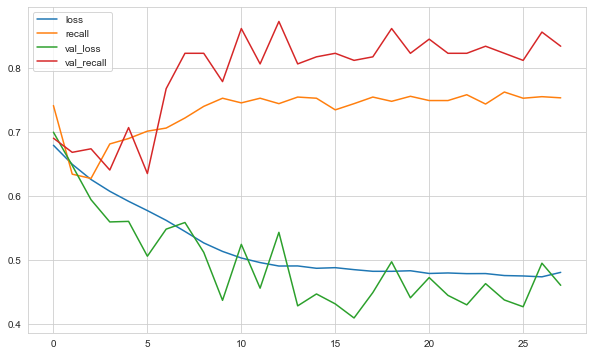

In [178]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [179]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5858337879180908
recall :  0.8235294222831726


In [180]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[523 273]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77       796
           1       0.38      0.82      0.52       204

    accuracy                           0.69      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.69      0.72      1000



In [181]:
model.save('model_churn.h5')

#### Loading Model and Scaler

In [182]:
from tensorflow.keras.models import load_model

In [183]:
model_cancer = load_model('model_churn.h5')
scaler_cancer = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [184]:
sample = df.drop('Exited', axis = 1).iloc[0:1, :]
sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [185]:
(model_cancer.predict(sample) > 0.5).astype("int32")

1/1 [==============================] - 0s 52ms/step


array([[1]])

In [186]:
df["Exited"].iloc[0]

1

## Comparison with ML

#### Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[764  32]
 [167  37]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       796
           1       0.54      0.18      0.27       204

    accuracy                           0.80      1000
   macro avg       0.68      0.57      0.58      1000
weighted avg       0.76      0.80      0.76      1000



#### Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[758  38]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.83      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___